In [100]:
import torch
from matplotlib import pyplot as plt
import torch.optim as optim

In [42]:
t_c = [0.5, 14, 15, 28, 11, 8, 3, -4, 6, 13, 21]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [43]:
def model(t_u, w, b):
    return w*t_u+b

In [44]:
def loss_fn(t_p, t_c):
    squared_diff = (t_p-t_c)**2
    return squared_diff.mean()

In [45]:
w = torch.ones(())

In [46]:
w = torch.ones(())
b = torch.zeros(())

In [47]:
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [48]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [49]:
w*t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [50]:
delta = .1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_u))/(2*delta)  

In [51]:
learning_rate = 1e-2
w = w - learning_rate*loss_rate_of_change_w

In [52]:
loss_rate_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c))/(2*delta)
b = b - learning_rate * loss_rate_change_b

In [53]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2*(t_p - t_c)
    return dsq_diffs/t_p.size(0)

In [54]:
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db(t_u, w, b):
    return 1

In [55]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp*dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp*dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [105]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params = True):
    for epoch in range(1, n_epochs+1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('epoch %d: Loss %f' %(epoch, float(loss)))
        if(print_params):
            print('\tParams: ', params)
            print('\tGrad: ', grad)
    return params

In [106]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1,0]), t_u = t_u, t_c = t_c)

epoch 1: Loss 1763.884766
	Params:  tensor([-44.1730,  -0.8260])
	Grad:  tensor([4517.2964,   82.6000])
epoch 2: Loss 5802484.500000
	Params:  tensor([2568.4011,   45.1637])
	Grad:  tensor([-261257.4062,   -4598.9702])
epoch 3: Loss 19408029696.000000
	Params:  tensor([-148527.7344,   -2616.3931])
	Grad:  tensor([15109614.0000,   266155.6875])
epoch 4: Loss 64915905708032.000000
	Params:  tensor([8589999.0000,  151310.8906])
	Grad:  tensor([-8.7385e+08, -1.5393e+07])
epoch 5: Loss 217130525461053440.000000
	Params:  tensor([-4.9680e+08, -8.7510e+06])
	Grad:  tensor([5.0539e+10, 8.9023e+08])
epoch 6: Loss 726257583152928129024.000000
	Params:  tensor([2.8732e+10, 5.0610e+08])
	Grad:  tensor([-2.9229e+12, -5.1486e+10])
epoch 7: Loss 2429183416467662896627712.000000
	Params:  tensor([-1.6617e+12, -2.9270e+10])
	Grad:  tensor([1.6904e+14, 2.9776e+12])
epoch 8: Loss 8125122549611731432050262016.000000
	Params:  tensor([9.6102e+13, 1.6928e+12])
	Grad:  tensor([-9.7764e+15, -1.7221e+14])
epoc

tensor([nan, nan])

In [107]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1,0]), t_u = t_u, t_c = t_c)

epoch 1: Loss 1763.884766
	Params:  tensor([ 0.5483, -0.0083])
	Grad:  tensor([4517.2964,   82.6000])
epoch 2: Loss 323.090515
	Params:  tensor([ 0.3623, -0.0118])
	Grad:  tensor([1859.5493,   35.7843])
epoch 3: Loss 78.929634
	Params:  tensor([ 0.2858, -0.0135])
	Grad:  tensor([765.4666,  16.5122])
epoch 4: Loss 37.552845
	Params:  tensor([ 0.2543, -0.0143])
	Grad:  tensor([315.0790,   8.5787])
epoch 5: Loss 30.540283
	Params:  tensor([ 0.2413, -0.0149])
	Grad:  tensor([129.6733,   5.3127])
epoch 6: Loss 29.351154
	Params:  tensor([ 0.2360, -0.0153])
	Grad:  tensor([53.3495,  3.9682])
epoch 7: Loss 29.148884
	Params:  tensor([ 0.2338, -0.0156])
	Grad:  tensor([21.9304,  3.4148])
epoch 8: Loss 29.113848
	Params:  tensor([ 0.2329, -0.0159])
	Grad:  tensor([8.9964, 3.1869])
epoch 9: Loss 29.107145
	Params:  tensor([ 0.2325, -0.0162])
	Grad:  tensor([3.6721, 3.0930])
epoch 10: Loss 29.105247
	Params:  tensor([ 0.2324, -0.0166])
	Grad:  tensor([1.4803, 3.0544])
epoch 11: Loss 29.104168
	Pa

tensor([ 0.2327, -0.0438])

In [108]:
t_un = 0.1 * t_u

In [109]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1,0]), t_u = t_un, t_c = t_c, print_params=False)

epoch 1: Loss 80.364342
epoch 2: Loss 37.574913
epoch 3: Loss 30.871077
epoch 4: Loss 29.756193
epoch 5: Loss 29.507153
epoch 6: Loss 29.392456
epoch 7: Loss 29.298828
epoch 8: Loss 29.208717
epoch 9: Loss 29.119415
epoch 10: Loss 29.030489
epoch 11: Loss 28.941877
epoch 12: Loss 28.853565
epoch 13: Loss 28.765553
epoch 14: Loss 28.677851
epoch 15: Loss 28.590431
epoch 16: Loss 28.503319
epoch 17: Loss 28.416498
epoch 18: Loss 28.329973
epoch 19: Loss 28.243742
epoch 20: Loss 28.157804
epoch 21: Loss 28.072151
epoch 22: Loss 27.986797
epoch 23: Loss 27.901728
epoch 24: Loss 27.816950
epoch 25: Loss 27.732464
epoch 26: Loss 27.648256
epoch 27: Loss 27.564344
epoch 28: Loss 27.480707
epoch 29: Loss 27.397362
epoch 30: Loss 27.314295
epoch 31: Loss 27.231512
epoch 32: Loss 27.149010
epoch 33: Loss 27.066790
epoch 34: Loss 26.984844
epoch 35: Loss 26.903175
epoch 36: Loss 26.821791
epoch 37: Loss 26.740679
epoch 38: Loss 26.659838
epoch 39: Loss 26.579279
epoch 40: Loss 26.498987
epoch 41:

epoch 544: Loss 7.174683
epoch 545: Loss 7.160266
epoch 546: Loss 7.145897
epoch 547: Loss 7.131581
epoch 548: Loss 7.117305
epoch 549: Loss 7.103083
epoch 550: Loss 7.088911
epoch 551: Loss 7.074785
epoch 552: Loss 7.060707
epoch 553: Loss 7.046676
epoch 554: Loss 7.032695
epoch 555: Loss 7.018755
epoch 556: Loss 7.004870
epoch 557: Loss 6.991028
epoch 558: Loss 6.977232
epoch 559: Loss 6.963488
epoch 560: Loss 6.949787
epoch 561: Loss 6.936135
epoch 562: Loss 6.922528
epoch 563: Loss 6.908967
epoch 564: Loss 6.895452
epoch 565: Loss 6.881980
epoch 566: Loss 6.868559
epoch 567: Loss 6.855180
epoch 568: Loss 6.841848
epoch 569: Loss 6.828561
epoch 570: Loss 6.815319
epoch 571: Loss 6.802118
epoch 572: Loss 6.788968
epoch 573: Loss 6.775864
epoch 574: Loss 6.762797
epoch 575: Loss 6.749779
epoch 576: Loss 6.736804
epoch 577: Loss 6.723876
epoch 578: Loss 6.710987
epoch 579: Loss 6.698142
epoch 580: Loss 6.685345
epoch 581: Loss 6.672589
epoch 582: Loss 6.659873
epoch 583: Loss 6.647207


epoch 1063: Loss 3.654816
epoch 1064: Loss 3.652349
epoch 1065: Loss 3.649889
epoch 1066: Loss 3.647437
epoch 1067: Loss 3.644991
epoch 1068: Loss 3.642559
epoch 1069: Loss 3.640132
epoch 1070: Loss 3.637711
epoch 1071: Loss 3.635302
epoch 1072: Loss 3.632902
epoch 1073: Loss 3.630508
epoch 1074: Loss 3.628119
epoch 1075: Loss 3.625741
epoch 1076: Loss 3.623374
epoch 1077: Loss 3.621010
epoch 1078: Loss 3.618659
epoch 1079: Loss 3.616311
epoch 1080: Loss 3.613973
epoch 1081: Loss 3.611643
epoch 1082: Loss 3.609321
epoch 1083: Loss 3.607008
epoch 1084: Loss 3.604701
epoch 1085: Loss 3.602403
epoch 1086: Loss 3.600114
epoch 1087: Loss 3.597831
epoch 1088: Loss 3.595553
epoch 1089: Loss 3.593287
epoch 1090: Loss 3.591030
epoch 1091: Loss 3.588776
epoch 1092: Loss 3.586534
epoch 1093: Loss 3.584294
epoch 1094: Loss 3.582067
epoch 1095: Loss 3.579845
epoch 1096: Loss 3.577631
epoch 1097: Loss 3.575424
epoch 1098: Loss 3.573225
epoch 1099: Loss 3.571035
epoch 1100: Loss 3.568848
epoch 1101: 

epoch 1570: Loss 3.057338
epoch 1571: Loss 3.056898
epoch 1572: Loss 3.056458
epoch 1573: Loss 3.056019
epoch 1574: Loss 3.055585
epoch 1575: Loss 3.055151
epoch 1576: Loss 3.054717
epoch 1577: Loss 3.054286
epoch 1578: Loss 3.053857
epoch 1579: Loss 3.053427
epoch 1580: Loss 3.053000
epoch 1581: Loss 3.052576
epoch 1582: Loss 3.052152
epoch 1583: Loss 3.051730
epoch 1584: Loss 3.051306
epoch 1585: Loss 3.050888
epoch 1586: Loss 3.050471
epoch 1587: Loss 3.050052
epoch 1588: Loss 3.049639
epoch 1589: Loss 3.049223
epoch 1590: Loss 3.048811
epoch 1591: Loss 3.048398
epoch 1592: Loss 3.047991
epoch 1593: Loss 3.047581
epoch 1594: Loss 3.047173
epoch 1595: Loss 3.046768
epoch 1596: Loss 3.046362
epoch 1597: Loss 3.045960
epoch 1598: Loss 3.045559
epoch 1599: Loss 3.045160
epoch 1600: Loss 3.044759
epoch 1601: Loss 3.044361
epoch 1602: Loss 3.043966
epoch 1603: Loss 3.043571
epoch 1604: Loss 3.043176
epoch 1605: Loss 3.042785
epoch 1606: Loss 3.042395
epoch 1607: Loss 3.042005
epoch 1608: 

epoch 2059: Loss 2.952235
epoch 2060: Loss 2.952152
epoch 2061: Loss 2.952068
epoch 2062: Loss 2.951985
epoch 2063: Loss 2.951902
epoch 2064: Loss 2.951820
epoch 2065: Loss 2.951738
epoch 2066: Loss 2.951656
epoch 2067: Loss 2.951576
epoch 2068: Loss 2.951494
epoch 2069: Loss 2.951413
epoch 2070: Loss 2.951333
epoch 2071: Loss 2.951252
epoch 2072: Loss 2.951171
epoch 2073: Loss 2.951093
epoch 2074: Loss 2.951012
epoch 2075: Loss 2.950932
epoch 2076: Loss 2.950853
epoch 2077: Loss 2.950774
epoch 2078: Loss 2.950697
epoch 2079: Loss 2.950618
epoch 2080: Loss 2.950540
epoch 2081: Loss 2.950463
epoch 2082: Loss 2.950385
epoch 2083: Loss 2.950308
epoch 2084: Loss 2.950231
epoch 2085: Loss 2.950154
epoch 2086: Loss 2.950078
epoch 2087: Loss 2.950003
epoch 2088: Loss 2.949925
epoch 2089: Loss 2.949850
epoch 2090: Loss 2.949776
epoch 2091: Loss 2.949699
epoch 2092: Loss 2.949626
epoch 2093: Loss 2.949550
epoch 2094: Loss 2.949476
epoch 2095: Loss 2.949401
epoch 2096: Loss 2.949328
epoch 2097: 

epoch 2583: Loss 2.931786
epoch 2584: Loss 2.931771
epoch 2585: Loss 2.931759
epoch 2586: Loss 2.931742
epoch 2587: Loss 2.931729
epoch 2588: Loss 2.931717
epoch 2589: Loss 2.931701
epoch 2590: Loss 2.931687
epoch 2591: Loss 2.931674
epoch 2592: Loss 2.931660
epoch 2593: Loss 2.931648
epoch 2594: Loss 2.931632
epoch 2595: Loss 2.931619
epoch 2596: Loss 2.931606
epoch 2597: Loss 2.931593
epoch 2598: Loss 2.931580
epoch 2599: Loss 2.931566
epoch 2600: Loss 2.931554
epoch 2601: Loss 2.931538
epoch 2602: Loss 2.931526
epoch 2603: Loss 2.931512
epoch 2604: Loss 2.931499
epoch 2605: Loss 2.931488
epoch 2606: Loss 2.931474
epoch 2607: Loss 2.931462
epoch 2608: Loss 2.931448
epoch 2609: Loss 2.931436
epoch 2610: Loss 2.931423
epoch 2611: Loss 2.931411
epoch 2612: Loss 2.931397
epoch 2613: Loss 2.931384
epoch 2614: Loss 2.931371
epoch 2615: Loss 2.931358
epoch 2616: Loss 2.931346
epoch 2617: Loss 2.931335
epoch 2618: Loss 2.931322
epoch 2619: Loss 2.931308
epoch 2620: Loss 2.931296
epoch 2621: 

epoch 3066: Loss 2.928447
epoch 3067: Loss 2.928443
epoch 3068: Loss 2.928444
epoch 3069: Loss 2.928440
epoch 3070: Loss 2.928435
epoch 3071: Loss 2.928435
epoch 3072: Loss 2.928430
epoch 3073: Loss 2.928428
epoch 3074: Loss 2.928426
epoch 3075: Loss 2.928423
epoch 3076: Loss 2.928421
epoch 3077: Loss 2.928417
epoch 3078: Loss 2.928416
epoch 3079: Loss 2.928411
epoch 3080: Loss 2.928410
epoch 3081: Loss 2.928407
epoch 3082: Loss 2.928404
epoch 3083: Loss 2.928402
epoch 3084: Loss 2.928399
epoch 3085: Loss 2.928396
epoch 3086: Loss 2.928395
epoch 3087: Loss 2.928392
epoch 3088: Loss 2.928389
epoch 3089: Loss 2.928386
epoch 3090: Loss 2.928383
epoch 3091: Loss 2.928382
epoch 3092: Loss 2.928379
epoch 3093: Loss 2.928378
epoch 3094: Loss 2.928375
epoch 3095: Loss 2.928372
epoch 3096: Loss 2.928370
epoch 3097: Loss 2.928368
epoch 3098: Loss 2.928364
epoch 3099: Loss 2.928362
epoch 3100: Loss 2.928361
epoch 3101: Loss 2.928356
epoch 3102: Loss 2.928355
epoch 3103: Loss 2.928353
epoch 3104: 

epoch 3588: Loss 2.927782
epoch 3589: Loss 2.927781
epoch 3590: Loss 2.927781
epoch 3591: Loss 2.927781
epoch 3592: Loss 2.927780
epoch 3593: Loss 2.927780
epoch 3594: Loss 2.927778
epoch 3595: Loss 2.927779
epoch 3596: Loss 2.927778
epoch 3597: Loss 2.927778
epoch 3598: Loss 2.927779
epoch 3599: Loss 2.927777
epoch 3600: Loss 2.927776
epoch 3601: Loss 2.927775
epoch 3602: Loss 2.927776
epoch 3603: Loss 2.927773
epoch 3604: Loss 2.927775
epoch 3605: Loss 2.927775
epoch 3606: Loss 2.927775
epoch 3607: Loss 2.927773
epoch 3608: Loss 2.927773
epoch 3609: Loss 2.927773
epoch 3610: Loss 2.927772
epoch 3611: Loss 2.927772
epoch 3612: Loss 2.927770
epoch 3613: Loss 2.927772
epoch 3614: Loss 2.927771
epoch 3615: Loss 2.927770
epoch 3616: Loss 2.927770
epoch 3617: Loss 2.927769
epoch 3618: Loss 2.927768
epoch 3619: Loss 2.927769
epoch 3620: Loss 2.927768
epoch 3621: Loss 2.927767
epoch 3622: Loss 2.927767
epoch 3623: Loss 2.927767
epoch 3624: Loss 2.927765
epoch 3625: Loss 2.927766
epoch 3626: 

epoch 4093: Loss 2.927670
epoch 4094: Loss 2.927670
epoch 4095: Loss 2.927669
epoch 4096: Loss 2.927670
epoch 4097: Loss 2.927670
epoch 4098: Loss 2.927671
epoch 4099: Loss 2.927670
epoch 4100: Loss 2.927671
epoch 4101: Loss 2.927670
epoch 4102: Loss 2.927670
epoch 4103: Loss 2.927671
epoch 4104: Loss 2.927669
epoch 4105: Loss 2.927670
epoch 4106: Loss 2.927670
epoch 4107: Loss 2.927670
epoch 4108: Loss 2.927670
epoch 4109: Loss 2.927668
epoch 4110: Loss 2.927669
epoch 4111: Loss 2.927669
epoch 4112: Loss 2.927670
epoch 4113: Loss 2.927670
epoch 4114: Loss 2.927670
epoch 4115: Loss 2.927670
epoch 4116: Loss 2.927669
epoch 4117: Loss 2.927669
epoch 4118: Loss 2.927670
epoch 4119: Loss 2.927669
epoch 4120: Loss 2.927670
epoch 4121: Loss 2.927668
epoch 4122: Loss 2.927668
epoch 4123: Loss 2.927669
epoch 4124: Loss 2.927668
epoch 4125: Loss 2.927670
epoch 4126: Loss 2.927666
epoch 4127: Loss 2.927669
epoch 4128: Loss 2.927668
epoch 4129: Loss 2.927669
epoch 4130: Loss 2.927667
epoch 4131: 

epoch 4618: Loss 2.927650
epoch 4619: Loss 2.927651
epoch 4620: Loss 2.927650
epoch 4621: Loss 2.927650
epoch 4622: Loss 2.927651
epoch 4623: Loss 2.927650
epoch 4624: Loss 2.927651
epoch 4625: Loss 2.927651
epoch 4626: Loss 2.927651
epoch 4627: Loss 2.927651
epoch 4628: Loss 2.927650
epoch 4629: Loss 2.927651
epoch 4630: Loss 2.927651
epoch 4631: Loss 2.927650
epoch 4632: Loss 2.927651
epoch 4633: Loss 2.927651
epoch 4634: Loss 2.927650
epoch 4635: Loss 2.927650
epoch 4636: Loss 2.927650
epoch 4637: Loss 2.927649
epoch 4638: Loss 2.927650
epoch 4639: Loss 2.927650
epoch 4640: Loss 2.927649
epoch 4641: Loss 2.927650
epoch 4642: Loss 2.927649
epoch 4643: Loss 2.927650
epoch 4644: Loss 2.927650
epoch 4645: Loss 2.927649
epoch 4646: Loss 2.927649
epoch 4647: Loss 2.927650
epoch 4648: Loss 2.927650
epoch 4649: Loss 2.927649
epoch 4650: Loss 2.927650
epoch 4651: Loss 2.927649
epoch 4652: Loss 2.927650
epoch 4653: Loss 2.927651
epoch 4654: Loss 2.927650
epoch 4655: Loss 2.927650
epoch 4656: 

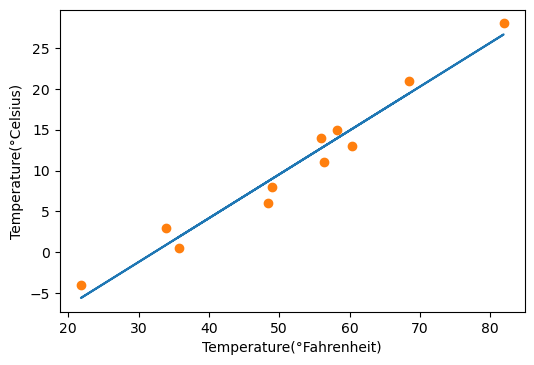

In [89]:
t_p = model(t_un, *params)
fig = plt.figure(dpi = 100)
plt.xlabel('Temperature(°Fahrenheit)')
plt.ylabel('Temperature(°Celsius)')
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [110]:
params = torch.tensor([1, 0], dtype = float, requires_grad = True)

In [111]:
print(params.grad)

None


In [112]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000], dtype=torch.float64)

In [113]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad:
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print('epoch %d, Loss%f' % (epoch, float(loss)))
    return params

In [114]:
params.grad
params.grad.zero_()

tensor([0., 0.], dtype=torch.float64)

In [115]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [118]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr = learning_rate)

In [119]:
t_p = model(t_u, *params)

In [120]:
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [121]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f'%(epoch, float(loss)))
    return params
    

In [122]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [124]:
n_sample = t_u.shape[0]
n_val = int(0.2 * n_sample)
shuffled_indices = torch.randperm(n_sample)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices 

(tensor([ 8,  2,  0, 10,  7,  6,  3,  4,  9]), tensor([5, 1]))

In [125]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1*train_t_u
val_t_un = 0.1*val_t_u